# Выборка #5

In [4]:
%run init.py
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Обзор данных

In [5]:
dataset = Dataset(5)
dataset.summary()

+---------+-----------------------+----------------------+-------------+------------------+
| Выборка | Обучающая, # объектов | Тестовая, # объектов | # признаков | Доля класса 1, % |
+---------+-----------------------+----------------------+-------------+------------------+
|    5    |          1000         |        10000         |     5000    |       37.3       |
+---------+-----------------------+----------------------+-------------+------------------+


In [12]:
#dataset.heatmap()

In [3]:
D_kls = dataset.divergences(verbose=False)

In [4]:
D_kls[D_kls>0.01].shape[0]

484

In [5]:
for i in range(D_kls.shape[0]):
    if D_kls[i]>0.1:
        print(i)

15
2345
4567


In [6]:
print(D_kls[15], D_kls[2345], D_kls[4567])

0.33686922507270645 0.43720733752843044 0.5614398512663246


Признак номер 4567

Класс 1:
Среднее значение (mu): 0.5940341844092759
Стандартное отклонение (std): 0.8941532778424783

Класс 0:
Среднее значение (mu): -0.3533887572323124
Стандартное отклонение (std): 0.8856986504982306


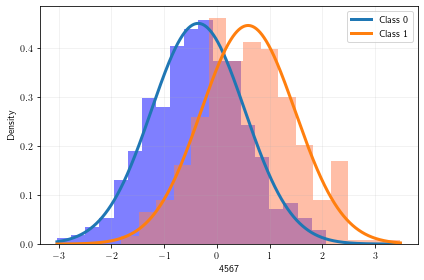

In [7]:
dataset.approx(4567)

Признак номер 2345

Класс 1:
Среднее значение (mu): 0.5414790282352858
Стандартное отклонение (std): 0.9243327935480551

Класс 0:
Среднее значение (mu): -0.32212388761046507
Стандартное отклонение (std): 0.8991301707789614


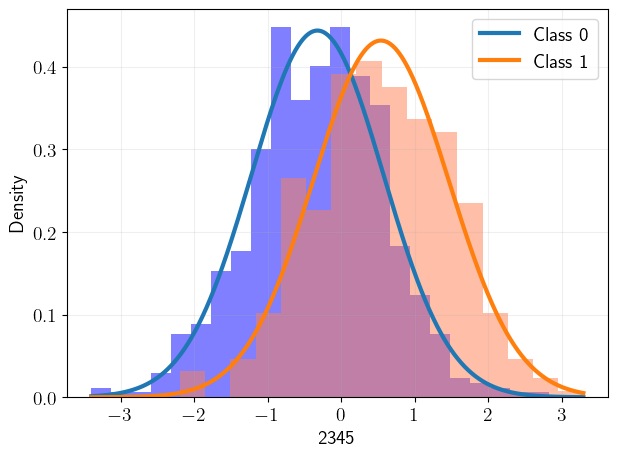

In [8]:
dataset.approx(2345)

Признак номер 15

Класс 1:
Среднее значение (mu): 0.48796123979795303
Стандартное отклонение (std): 0.9505049335984698

Класс 0:
Среднее значение (mu): -0.29028635158634203
Стандартное отклонение (std): 0.9118754623086959


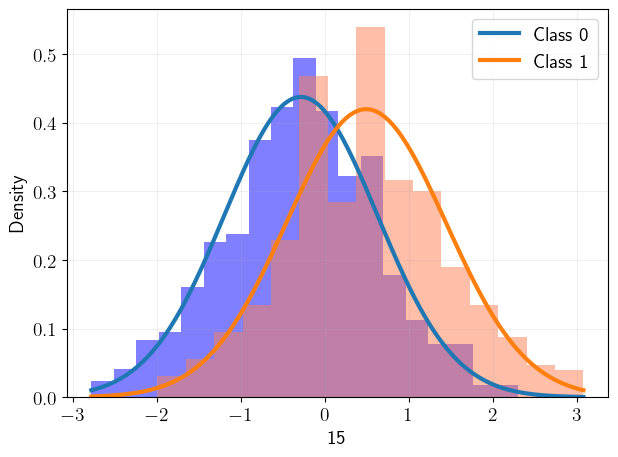

In [9]:
dataset.approx(15)

In [10]:
#dataset.target_corr()

In [11]:
#make_histplot(dataset.df)

### Проверка нормальности признаков

Используем критерий Шапиро-Уилка

In [8]:
pvals = [shapiro(dataset.X1[i])[1] for i in range(dataset.n_features)]

In [12]:
shapiro(dataset.X1[15])[1] > 0.05

0.17335811257362366

In [13]:
shapiro(dataset.X1[2345])[1] > 0.05

0.9632377624511719

In [14]:
shapiro(dataset.X1[4567])[1] > 0.05

0.3842984437942505

Получим достигаемые уровни значимости для нулевой гипотезы: "Распределение признака является нормальным"

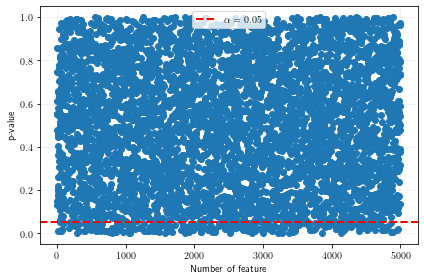

In [9]:
plt.plot(pvals, linestyle='None', marker='o')
plt.axhline(y=0.05, color='r', linestyle='dashed', label=r'$\alpha=0.05$')

plt.legend()
plt.xlabel('Number of feature')
plt.ylabel('p-value')
plt.grid(alpha=0.2)

plt.tight_layout()
plt.savefig(f'./fig/dataset_{dataset.dataset_id}/shapiro.pdf', bbox_inches='tight')
plt.show()

In [10]:
pvals = np.array(pvals)
np.sum(pvals < 0.05)

251

### Logistic Regression

100%|██████████| 5000/5000 [2:50:25<00:00,  2.05s/it]  


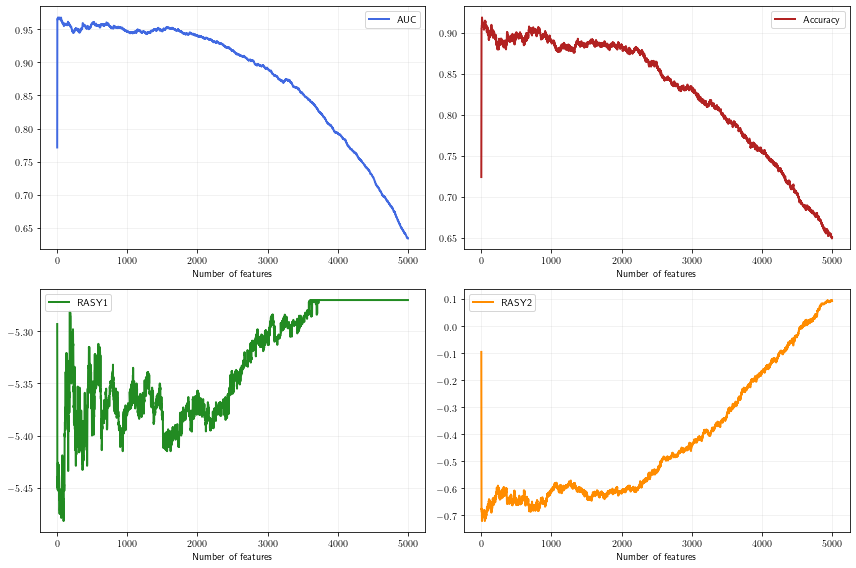

In [6]:
features_cols_lr = dataset.metrics_n_features_dependence(LogisticRegression(), None,  save=True)

100%|██████████| 21/21 [00:21<00:00,  1.00s/it]


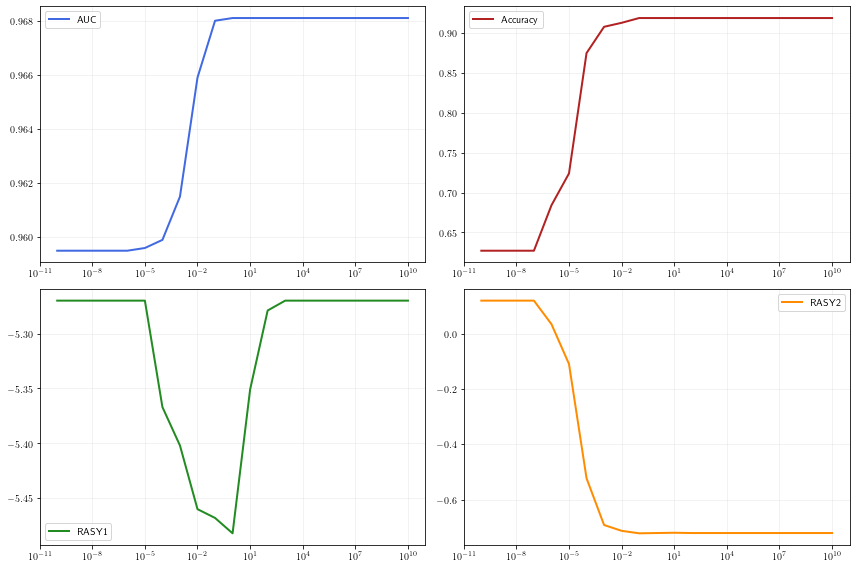

In [7]:
Cs_lr = LogisticRegressionValidate(dataset, features_cols_lr, np.logspace(-10, 10, 21), save=True)

### Наивный байес 

In [24]:
#features_cols_gnb = dataset.metrics_n_features_dependence(GaussianNB(), ks=range(1, dataset.df.shape[1], 499))

### CatBoost

In [11]:
#fit_params = {"verbose" : False, "plot" : False}

In [12]:
#dataset.metrics_n_features_dependence(CatBoostClassifier(), fit_params=fit_params,
                                      #ks=range(1, dataset.df.shape[1], 4))

In [13]:
#features_cb = dataset.feature_selection(n_cols=9)

In [14]:
#depths = [2, 3, 4, 5, 6, 7]
#CatBoostClassifierValidate(dataset, features_cb, depths)

### Saving aswers 

In [8]:
model_AUC = LogisticRegression(C=Cs_lr['AUC']['C'])
model_Accuracy = LogisticRegression(C=Cs_lr['Accuracy']['C'])
model_RASY1 = LogisticRegression(C=Cs_lr['RASY1']['C'])
model_RASY2 = LogisticRegression(C=Cs_lr['RASY2']['C'])
models = [model_AUC, model_Accuracy, model_RASY1, model_RASY2]

In [9]:
features_AUC, cols_AUC = features_cols_lr['AUC']['features'], features_cols_lr['AUC']['cols']
features_Accuracy, cols_Accuracy = features_cols_lr['Accuracy']['features'], features_cols_lr['Accuracy']['cols']
features_RASY1, cols_RASY1 = features_cols_lr['RASY1']['features'], features_cols_lr['RASY1']['cols']
features_RASY2, cols_RASY2 = features_cols_lr['RASY2']['features'], features_cols_lr['RASY2']['cols']
features_list = [features_AUC, features_Accuracy, features_RASY1, features_RASY2]
cols_list = [cols_AUC, cols_Accuracy, cols_RASY1, cols_RASY2]

In [10]:
t_Accuracy = features_cols_lr['Accuracy']['t']
t_RASY1 = features_cols_lr['RASY1']['t']
t_RASY2 = features_cols_lr['RASY2']['t']
thresholds_list = [t_Accuracy, t_RASY1, t_RASY2]

In [11]:
dataset.save_ans(models, features_list, cols_list, thresholds_list)

In [12]:
cols_list

[array([4567, 2345,   15, 2685, 1358, 4244, 2786, 1024, 1582, 3879, 2065,
        1998, 3261], dtype=int64),
 array([4567, 2345,   15, 2685, 1358, 4244, 2786, 1024, 1582, 3879],
       dtype=int64),
 array([4567, 2345,   15, 2685, 1358, 4244, 2786, 1024, 1582, 3879, 2065,
        1998, 3261, 2410, 4182, 4078, 1791, 3633,  984, 3832, 4712, 4965,
         191, 2748, 3775, 1520, 1054, 3348, 1233, 4293,  158, 4846, 4402,
        2556,  167, 4805, 3787, 2231, 2672, 1273, 1178, 3217, 3229, 2073,
        3862, 1697, 4621, 1755,  109,  561, 1549, 2831, 1492,   75, 4549,
        3952,  429, 1762, 3012,  226, 3546, 3034, 4501, 4396, 4481, 3889,
        4780, 1346, 2729, 3957, 4967, 2949, 4033, 2089, 1810, 3584, 2371,
        1586,  192, 3038, 3142, 1130, 1007, 2765, 4403, 1019, 2547,  526,
        4297,  479, 3939, 1396], dtype=int64),
 array([4567, 2345,   15, 2685, 1358, 4244, 2786, 1024, 1582, 3879],
       dtype=int64)]

In [13]:
print(f'{thresholds_list[0]:.2f}, {thresholds_list[1]:.2f}, {thresholds_list[2]:.2f}')

0.51, 0.97, 0.51


In [14]:
for i in range(4):
    print(cols_list[i].shape)

(13,)
(10,)
(92,)
(10,)


In [15]:
Cs_lr

{'AUC': {'C': 1.0},
 'Accuracy': {'t': 0.48484848484848486, 'C': 0.1},
 'RASY1': {'t': 0.9696969696969697, 'C': 1.0},
 'RASY2': {'t': 0.48484848484848486, 'C': 0.1}}